In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import time, json, os, csv, requests

from scipy.stats import linregress

from function.helper import clean_house_data, clean_school_data, clean_crime_data

# Hi Markers, please use your onw API keys to run the script, thank you!
from api_keys import g_key

# Set source file path
house_data_path = "data_source/Melbourne_housing_FULL.csv"
school_data_path = "data_source/dv309_schoollocations2021.csv"
crime_rate_path = "data_source/Data_Tables_LGA_Criminal_Incidents_Year_Ending_March_2021.xlsx"

# Set output file path
suburb_lat_lng = "output_files/suburb_lat_lng.csv"
suburb_lat_lng_and_station_count = "output_files/train_station_df.csv"
house_file = "data_source/cleaned_source_data/house_cleaned.csv"
school_file = "data_source/cleaned_source_data/school_cleaned.csv"
crime_file = "data_source/cleaned_source_data/crime_cleaned.csv"
output_file = "graphs/train_station_vs_house_price.png"

In [3]:
house_data = pd.read_csv(house_data_path)
house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [4]:
column_to_int_list = ["Postcode",
                      "Bathroom",
                      "Car",
                      "Landsize",
                      "BuildingArea",
                      "YearBuilt",
                      "Propertycount",
                      "Rooms"]

cleaned_house_data = clean_house_data(house_data, column_to_int_list)

cleaned_house_data.to_csv(house_file, index = False, encoding = "utf-8")

cleaned_house_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,1,1,202,0,0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,1,0,156,79,1900,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,2,0,134,150,1900,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,2,1,94,0,0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,1,2,120,142,2014,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019


In [5]:
school_data = pd.read_csv(school_data_path, encoding = "cp1252")
school_data.head()

,Education_Sector,Entity_Type,SCHOOL_NO,School_Name,School_Type,School_Status,Address_Line_1,Address_Line_2,Address_Town,Address_State,...,Postal_Address_Line_1,Postal_Address_Line_2,Postal_Town,Postal_State,Postal_Postcode,Full_Phone_No,LGA_ID,LGA_Name,X,Y
0,Government,1,1,Alberton Primary School,Primary,O,21 Thomson Street,NaN,Alberton,VIC,...,21 Thomson Street,NaN,ALBERTON,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,3,Allansford and District Primary School,Primary,O,Frank Street,NaN,Allansford,VIC,...,Frank Street,NaN,ALLANSFORD,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,4,Avoca Primary School,Primary,O,118 Barnett Street,NaN,Avoca,VIC,...,P O Box 12,NaN,AVOCA,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,8,Avenel Primary School,Primary,O,40 Anderson Street,NaN,Avenel,VIC,...,40 Anderson Street,NaN,AVENEL,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,12,Warrandyte Primary School,Primary,O,5-11 Forbes Street,NaN,Warrandyte,VIC,...,5-11 Forbes Street,NaN,WARRANDYTE,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [6]:
cleaned_school_data = clean_school_data(school_data)

cleaned_school_data.to_csv(school_file, index = False, encoding = "utf-8")

cleaned_school_data.head()

,Education_Sector,Entity_Type,School_Name,School_Type,School_Status,Address,Suburb,State,Postcode,Full_Phone_No,LGA_ID,LGA_Name,Lng,Lat
0,Government,1,Alberton Primary School,Primary,O,21 Thomson Street,Alberton,VIC,3971,03 5183 2412,681,Wellington (S),146.666601,-38.617713
1,Government,1,Allansford and District Primary School,Primary,O,Frank Street,Allansford,VIC,3277,03 5565 1382,673,Warrnambool (C),142.590393,-38.386281
2,Government,1,Avoca Primary School,Primary,O,118 Barnett Street,Avoca,VIC,3467,03 5465 3176,599,Pyrenees (S),143.475649,-37.084502
3,Government,1,Avenel Primary School,Primary,O,40 Anderson Street,Avenel,VIC,3664,03 5796 2264,643,Strathbogie (S),145.234722,-36.901368
4,Government,1,Warrandyte Primary School,Primary,O,5-11 Forbes Street,Warrandyte,VIC,3113,03 9844 3537,421,Manningham (C),145.213980,-37.742675


In [7]:
crime_data = pd.read_excel(crime_rate_path, sheet_name = "Table 03")
crime_data.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2021,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A211 FV Serious assault,1
1,2021,March,Alpine,3691,Glen Creek,C Drug offences,C30 Drug use and possession,C32 Drug possession,1
2,2021,March,Alpine,3691,Gundowring,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
3,2021,March,Alpine,3691,Gundowring,E Justice procedures offences,E10 Justice procedures,E13 Resist or hinder officer,1
4,2021,March,Alpine,3691,Kergunyah South,B Property and deception offences,B40 Theft,B49 Other theft,1


In [8]:
cleaned_crime_data = clean_crime_data(crime_data)

cleaned_crime_data.to_csv(crime_file, index = False, encoding = "utf-8")

cleaned_crime_data.head()

,Year,Year ending,Local Government Area,Postcode,Suburb/Town Name,Offence Division,Offence Subdivision,Offence Subgroup,Incidents Recorded
0,2018,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A231 FV Common assault,1
1,2018,March,Alpine,3691,Dederang,A Crimes against the person,A20 Assault and related offences,A232 Non-FV Common assault,1
2,2018,March,Alpine,3691,Dederang,A Crimes against the person,Other crimes against the person,Other crimes against the person,1
3,2018,March,Alpine,3691,Dederang,C Drug offences,C10 Drug dealing and trafficking,C12 Drug trafficking,1
4,2018,March,Alpine,3691,Glen Creek,D Public order and security offences,D10 Weapons and explosives offences,D11 Firearms offences,2


In [9]:
suburbs_price_mean = round(cleaned_house_data.groupby("Suburb").mean()["Price"], 0)
suburbs_price_mean_df = pd.DataFrame({"Avg House Price by Suburb": suburbs_price_mean})
suburbs_price_mean_df = suburbs_price_mean_df.reset_index()
suburbs_price_mean_df

,Suburb,Avg House Price by Suburb
0,Abbotsford,1033549.0
1,Aberfeldie,1307193.0
2,Airport West,751364.0
3,Albanvale,536056.0
4,Albert Park,1927651.0
...,...,...
340,Yallambie,820861.0
341,Yarra Glen,620000.0
342,Yarraville,991245.0
343,croydon,730000.0


In [23]:
# Drop un-needed columns from the original data frame
train_station_df = suburbs_price_mean_df.loc[:, ["Suburb", ]]

new_columns = ["Lat", "Lng", "Train Station Count"]
for row in new_columns:
    train_station_df[(row)] = ""

train_station_df = train_station_df.dropna()
train_station_df = train_station_df.drop_duplicates("Suburb")
train_station_df = train_station_df.reset_index(drop = True)
train_station_df

,Suburb,Lat,Lng,Train Station Count
0,Abbotsford,,,
1,Aberfeldie,,,
2,Airport West,,,
3,Albanvale,,,
4,Albert Park,,,
...,...,...,...,...
340,Yallambie,,,
341,Yarra Glen,,,
342,Yarraville,,,
343,croydon,,,


In [15]:
# Setup Query URL
base_url = "https://maps.googleapis.com/maps/api/geocode/json"

australia = ", melbourne, australia"
for index, suburb in enumerate(train_station_df["Suburb"]):
    fullAddress = suburb + australia
    
    params = {"key": g_key,
              "address": fullAddress}

    responded_json = requests.get(base_url, params).json()

    try:
        location = responded_json["results"][0]["geometry"]["location"]
        lat = location["lat"]
        lng = location["lng"]
        train_station_df.loc[[index], "Lat"] = lat
        train_station_df.loc[[index], "Lng"] = lng
    
    except:
        print(f"Data retrieve failure.")

In [16]:
train_station_df.to_csv(suburb_lat_lng, index = False, encoding = "utf-8")
train_station_df.head()

,Suburb,Lat,Lng,Train Station Count
0,Abbotsford,-37.803,145.002,
1,Aberfeldie,-37.762,144.901,
2,Airport West,-37.726234,144.881353,
3,Albanvale,-37.746,144.765,
4,Albert Park,-37.843861,144.951454,


In [17]:
# Base url for Google Places API - Nearby Search
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# Set parameters for the API call
params = {"keyword": "train",
          "type": "train_station",
          "key": g_key,
          "radius": 3000,
          "location": ""}

for index, row in train_station_df.iterrows():

    params["location"] = str(row[1]) + "," + str(row[2])

    response = requests.get(base_url, params).json()
    station_results = response["results"]
    
    station_list = []
    for result in station_results:
        station_list.append(result["name"])

    try:
        train_station_df.loc[[index], "Train Station Count"] = len(station_list)

    except:
        print((f"No station found for {row['Suburb']} within 3000 meters."))
    

In [18]:
train_station_df.to_csv(suburb_lat_lng_and_station_count, index = False, encoding = "utf-8")
train_station_df

,Suburb,Lat,Lng,Train Station Count
0,Abbotsford,-37.803,145.002,19
1,Aberfeldie,-37.762,144.901,8
2,Airport West,-37.726234,144.881353,1
3,Albanvale,-37.746,144.765,3
4,Albert Park,-37.843861,144.951454,4
...,...,...,...,...
340,Yallambie,-37.726,145.104,3
341,Yarra Glen,-37.648889,145.371944,0
342,Yarraville,-37.820274,144.88217,8
343,croydon,-37.794384,145.281543,2


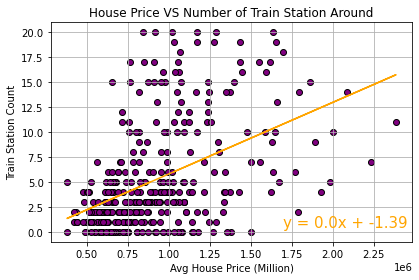

In [20]:
avg_price_station_df = pd.merge(train_station_df, suburbs_price_mean_df)
x_values = avg_price_station_df["Avg House Price by Suburb"].astype(int)
y_values = avg_price_station_df["Train Station Count"].astype(int)

color = "orange"
(slope, intercept, _, _, _,) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

plt.scatter(x_values,y_values, linewidths = 1, marker = "o", edgecolors = "black", color = "purple")
plt.plot(x_values,regress_values,color)
plt.annotate(line_eq,(1700000, 0.5), fontsize = 15, color = color)
plt.title("House Price VS Number of Train Station Around")
plt.xlabel("Avg House Price (Million)")
plt.ylabel("Train Station Count")
plt.tight_layout()
plt.grid(True)
plt.savefig(output_file)

In [29]:
ttest_result = stats.ttest_ind(x_values, y_values, equal_var = False)
(ttest_result)

Ttest_indResult(statistic=49.47824201934378, pvalue=1.7772186578173881e-158)
